# **Projeto: Prevendo o Impacto da IA nas Profissões**

## 1. Contextualização: Protegendo o Futuro do Trabalho Digital

Em um mercado de trabalho moldado por IA, automação e dados, novas plataformas digitais surgem para transformar a forma como as pessoas aprendem, colaboram e trabalham. Essas soluções — que podem envolver aprendizado contínuo, bem-estar corporativo, gestão de talentos ou inclusão produtiva — dependem de ambientes seguros, confiáveis e éticos.

Nesse cenário, a cibersegurança torna-se um pilar essencial para garantir que a inovação tecnológica seja usada de forma responsável, protegendo tanto as informações quanto as pessoas envolvidas em um mundo movido por inteligência artificial.

### O Desafio e Nosso Objetivo

Embora o tema central envolva a segurança das *plataformas*, uma parte fundamental da proteção do futuro do trabalho é entender o impacto humano dessa transformação. Como podemos garantir que os profissionais não sejam deixados para trás?

**O objetivo deste projeto** é usar o Machine Learning como uma ferramenta de análise preditiva para navegar essa mudança. Desenvolvemos uma solução capaz de analisar dados sobre profissões e habilidades humanas para **prever o impacto da Inteligência Artificial em diferentes ocupações**.

Nossa análise busca responder perguntas críticas:
* Qual é o risco de automação para uma determinada profissão?
* Qual é a necessidade de requalificação (reskilling)?
* Onde está o maior potencial para a IA *ampliar* a produtividade humana, em vez de substituí-la?

### A Solução: Um Pipeline de Machine Learning

Para alcançar esse objetivo, construímos um pipeline de dados completo que transforma dados brutos em insights acionáveis. Nossa abordagem foi dividida em quatro etapas principais:

1.  **Análise Exploratória (EDA):** Investigamos o dataset `AI Impact on Job Market` para extrair insights iniciais, identificar as variáveis mais influentes e entender as tendências de automação por indústria.
2.  **Análise Não Supervisionada (Clusterização):** Aplicamos o K-Means para agrupar profissões com características semelhantes, revelando "arquétipos" de ocupações que enfrentam riscos e oportunidades parecidos.
3.  **Análise Supervisionada (Predição):** Treinamos e otimizamos (usando `GridSearchCV`) um modelo de classificação para prever o nível de impacto da IA (ou risco de automação) para qualquer profissão, com base em suas características. O modelo final foi salvo como `modelo.pkl`.
4.  **Inferência Interativa (Streamlit):** Desenvolvemos uma aplicação web onde qualquer usuário pode inserir as características de uma profissão e receber uma previsão instantânea e interpretável do modelo.

### Estrutura deste Relatório

Nas seções seguintes, apresentaremos em detalhes cada etapa deste pipeline, desde a exploração inicial dos dados até a demonstração da ferramenta interativa, mostrando como o Machine Learning pode ser um aliado fundamental para um futuro do trabalho mais seguro e preparado.

## 2. Importação das bibliotecas e dataset


In [43]:
# Importamos todas as ferramentas necessárias para manipulação de dados, visualização, pré-processamento, modelagem e métricas.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bibliotecas do Scikit-Learn para ML
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import joblib # Para salvar os modelos

# Configuração de estilo dos gráficos
sns.set_theme(style="whitegrid")


In [44]:
# Carregue seu dataset
try:
    df = pd.read_csv('/content/ai_job_trends_dataset (1).csv') # Adapte o nome do arquivo
except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o caminho e o nome do arquivo.")

## 3. Análise Exploratória de Dados (EDA)

Nesta seção, realizamos uma investigação profunda no dataset "AI Impact on Job Market" (2024–2030) para entender suas características principais, identificar padrões e extrair os primeiros insights que guiarão nossa modelagem.## 2. Análise Exploratória de Dados (EDA)



In [45]:
print("\n--- 5 Primeiras Linhas ---")
display(df.head())


--- 5 Primeiras Linhas ---


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


## Dicionário de Variáveis

Para entender nossos dados, é crucial definir o que cada variável representa:

* **`Job Title`**:
    * **Descrição:** Nome do cargo ou ocupação profissional.
* **`Industry`**:
    * **Descrição:** O setor econômico ou indústria ao qual a profissão pertence (ex: TI, Saúde, Finanças).
* **`Median Salary (USD)`**:
    * **Descrição:** O salário mediano anual para a ocupação, expresso em dólares americanos.
* **`Experience Required (Years)`**:
    * **Descrição:** O número mediano de anos de experiência profissional exigidos para a qualificação.
* **`Required Education`**:
    * **Descrição:** O nível de escolaridade formal exigido (ex: Bacharelado, Mestrado, Doutorado).
* **`Job Openings (2024)`**:
    * **Descrição:** O número de vagas de emprego disponíveis ou estimadas para a ocupação no ano de 2024.
* **`Projected Openings (2030)`**:
    * **Descrição:** Uma projeção do número de vagas de emprego para a ocupação no ano de 2030.
* **`Remote Work Ratio (%)`**:
    * **Descrição:** A porcentagem de profissionais nessa ocupação que trabalham remotamente.
* **`Automation Risk (%)`**:
    * **Descrição:** A probabilidade estimada (em %) de que as tarefas centrais da ocupação sejam automatizadas.
* **`AI Impact Level`**:
    * **Descrição:** Classificação categórica da intensidade do impacto da IA sobre a profissão (ex: Alto, Médio, Baixo).
* **`Location`**:
    * **Descrição:** País em que a empresa está localizada.
* **`Gender Diversity (%)`**:
    * **Descrição:** A porcentagem de representatividade de gênero na ocupação (geralmente representação feminina).

In [46]:
print("\n--- Tamanho dataset ---")
print(df.shape)


--- Tamanho dataset ---
(30000, 13)


In [47]:
# Inspeção inicial
print("--- Informações do DataFrame ---")
df.info()



--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-nu

In [48]:
print("\n--- Medidas estatísitcas ---")
display(df.describe())


--- Medidas estatísitcas ---


,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,90119.965639,10.051433,5039.640833,5074.218100,49.836431,50.154229,49.979660
std,34412.013953,6.060678,2861.009654,2866.550722,28.966688,28.754889,17.274665
min,30001.860000,0.000000,100.000000,100.000000,0.000000,0.000000,20.000000
25%,60500.702500,5.000000,2570.000000,2586.750000,24.570000,25.400000,35.070000
50%,90274.115000,10.000000,5034.000000,5106.500000,49.570000,50.020000,49.885000
75%,119454.710000,15.000000,7527.000000,7573.000000,75.100000,75.030000,64.910000
max,149998.500000,20.000000,10000.000000,10000.000000,100.000000,99.990000,80.000000


###3.1 Limpeza dos dados

In [49]:
print("\n--- Verificação de Valores Nulos ---")
print(df.isnull().sum())



--- Verificação de Valores Nulos ---
Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64


In [50]:
print("\n--- Verificação de Valores Duplicados ---")
print(df.duplicated().sum())


--- Verificação de Valores Duplicados ---
0


Sem valores nulos e/ou duplicados, portanto não é necessário aplicar códigos para limpeza de dados

### Perguntas

/tmp/ipython-input-3946268435.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


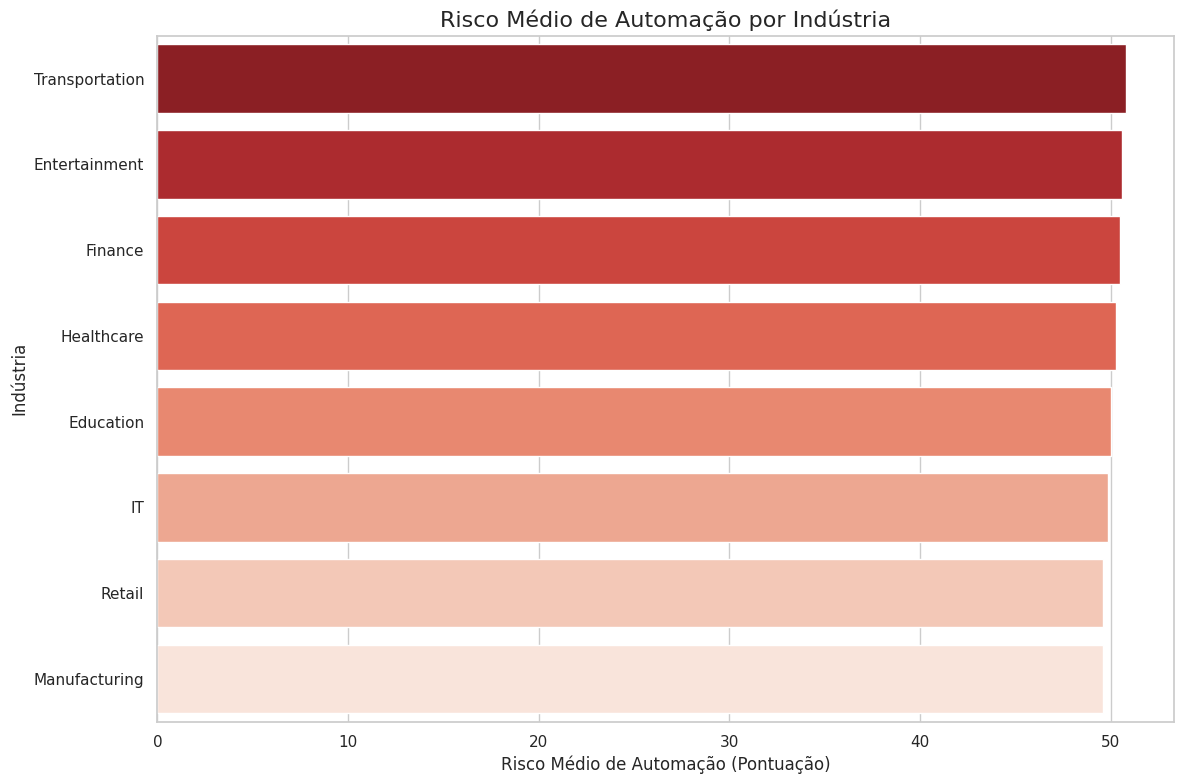


--- Risco Médio por Indústria (Top 5) ---


,Industry,Automation Risk (%)
0,Transportation,50.79
1,Entertainment,50.59
2,Finance,50.51
3,Healthcare,50.27
4,Education,50.01


In [51]:
# 2. PERGUNTA 1: Quais domínios/mercados/indústrias têm maior risco de automação?
coluna_industria = 'Industry'
coluna_risco = 'Automation Risk (%)'

if coluna_industria in df.columns and coluna_risco in df.columns:
    # Calcular o risco médio por indústria
    risco_por_industria = df.groupby(coluna_industria)[coluna_risco].mean().sort_values(ascending=False).reset_index()
    risco_por_industria[coluna_risco] = risco_por_industria[coluna_risco].round(2)
    # Visualização
    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=risco_por_industria,
        x=coluna_risco,
        y=coluna_industria,
        palette="Reds_r" # Cores do maior risco (vermelho) para o menor
    )

    plt.title('Risco Médio de Automação por Indústria', fontsize=16)
    plt.xlabel('Risco Médio de Automação (Pontuação)', fontsize=12)
    plt.ylabel('Indústria', fontsize=12)
    plt.tight_layout()
    plt.show()

    print("\n--- Risco Médio por Indústria (Top 5) ---")
    display(risco_por_industria.head())
else:
    print(f"ERRO: Verifique os nomes das colunas '{coluna_industria}' ou '{coluna_risco}'.")

A análise do risco médio de automação por indústria revela um insight crucial: o impacto da IA não está isolado em setores puramente técnicos.

Embora 'Transporte' (50.79%) lidere o ranking, o que é esperado devido a tecnologias como veículos autônomos, é notável que setores tradicionalmente dependentes de interação humana, como 'Entretenimento' (50.59%), 'Saúde' (50.27%) e 'Educação' (50.01%), também apresentem um risco médio superior a 50%.

Isso sugere que o risco de automação é generalizado. Em setores como Finanças e Transportes, isso pode significar a substituição direta de tarefas (ex: trading algorítmico). Em setores como Saúde e Educação, isso provavelmente indica uma forte tendência para a automatização de tarefas administrativas e de diagnóstico (ex: IA lendo exames, plataformas de ensino adaptativo), o que pode levar a uma redefinição das funções, em vez de uma substituição completa.

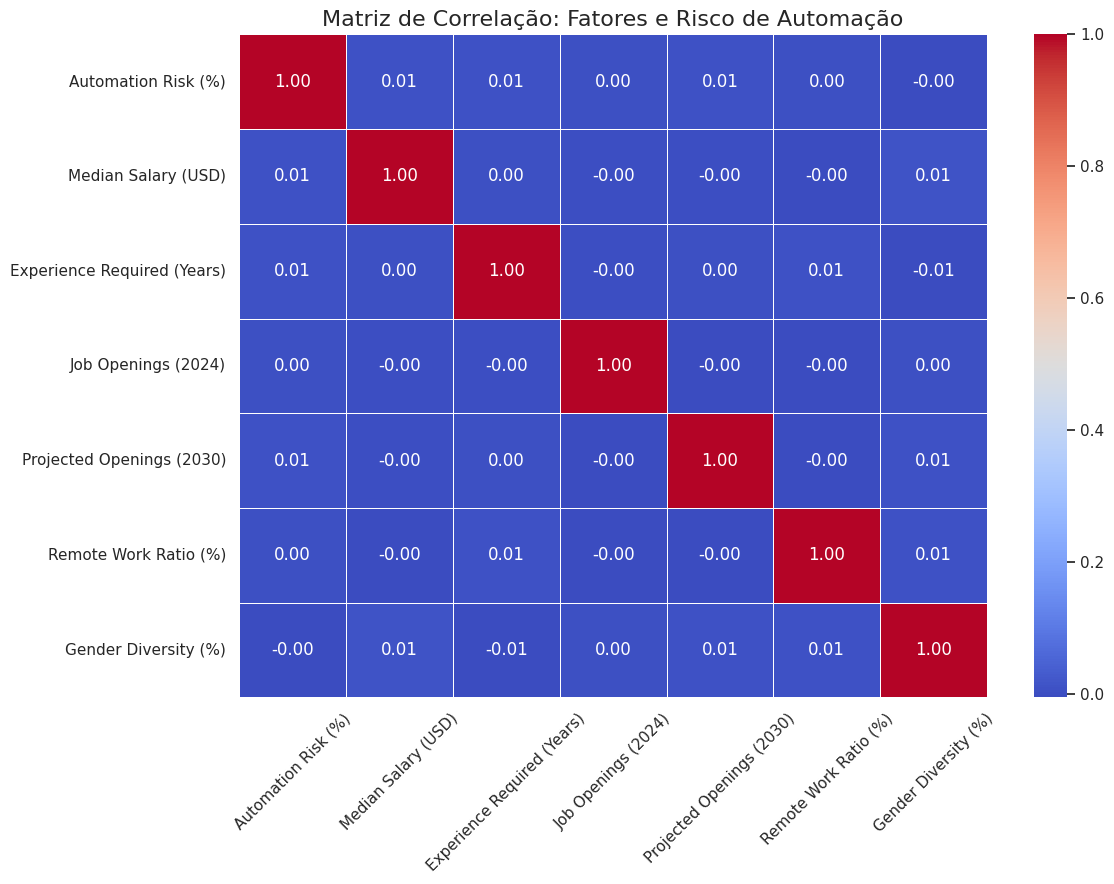


--- Correlação com 'Automation Risk (%)' ---
Automation Risk (%)            1.000000
Median Salary (USD)            0.007980
Projected Openings (2030)      0.007434
Experience Required (Years)    0.006541
Remote Work Ratio (%)          0.004851
Job Openings (2024)            0.003284
Gender Diversity (%)          -0.003737
Name: Automation Risk (%), dtype: float64


In [52]:
# 3. PERGUNTA 2: Quais variáveis mais influenciam o impacto da IA?

coluna_risco = 'Automation Risk (%)'

variaveis_relevantes = [
    coluna_risco,
   'Median Salary (USD)',
    'Experience Required (Years)',
    'Job Openings (2024)',
    'Projected Openings (2030)',
    'Remote Work Ratio (%)',
    'Gender Diversity (%)'
]

# Filtrar o DataFrame para colunas que existem
variaveis_existentes = [col for col in variaveis_relevantes if col in df.columns]

if len(variaveis_existentes) > 1:
    # Calcular a matriz de correlação
    corr_matrix = df[variaveis_existentes].corr()

    # Visualização do Heatmap
    plt.figure(figsize=(12, 9))
    sns.heatmap(
        corr_matrix,
        annot=True,     # Mostrar os números da correlação
        cmap='coolwarm', # Esquema de cores (vermelho=positivo, azul=negativo)
        fmt='.2f',      # Formatar com 2 casas decimais
        linewidths=0.5
    )
    plt.title('Matriz de Correlação: Fatores e Risco de Automação', fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Mostrar as correlações mais fortes com a variável-alvo
    if coluna_risco in corr_matrix:
        corr_alvo = corr_matrix[coluna_risco].sort_values(ascending=False)
        print(f"\n--- Correlação com '{coluna_risco}' ---")
        print(corr_alvo)
else:
    print(f"ERRO: Nenhuma ou poucas variáveis relevantes encontradas. Verifique a lista 'variaveis_relevantes'.")

O mapa de calor revela um resultado surpreendente e muito importante para o projeto: não existe praticamente nenhuma correlação linear entre o Automation Risk (%) e as outras variáveis numéricas do dataset, como Median Salary (USD) (0.01) ou Experience Required (Years) (0.01).

Isso indica que, com base nestes dados, fatores como salário, anos de experiência ou volume de vagas não são, isoladamente, bons indicadores para prever se uma profissão será automatizada.

Esta descoberta sugere que as variáveis mais influentes para prever o risco de automação são, muito provavelmente, as variáveis categóricas (como Industry, Occupation, Skill_Required, etc.), que não aparecem neste gráfico de correlação numérica. A natureza do trabalho (codificada nessas categorias) é o que realmente deve definir o risco, e não seus atributos quantitativos.

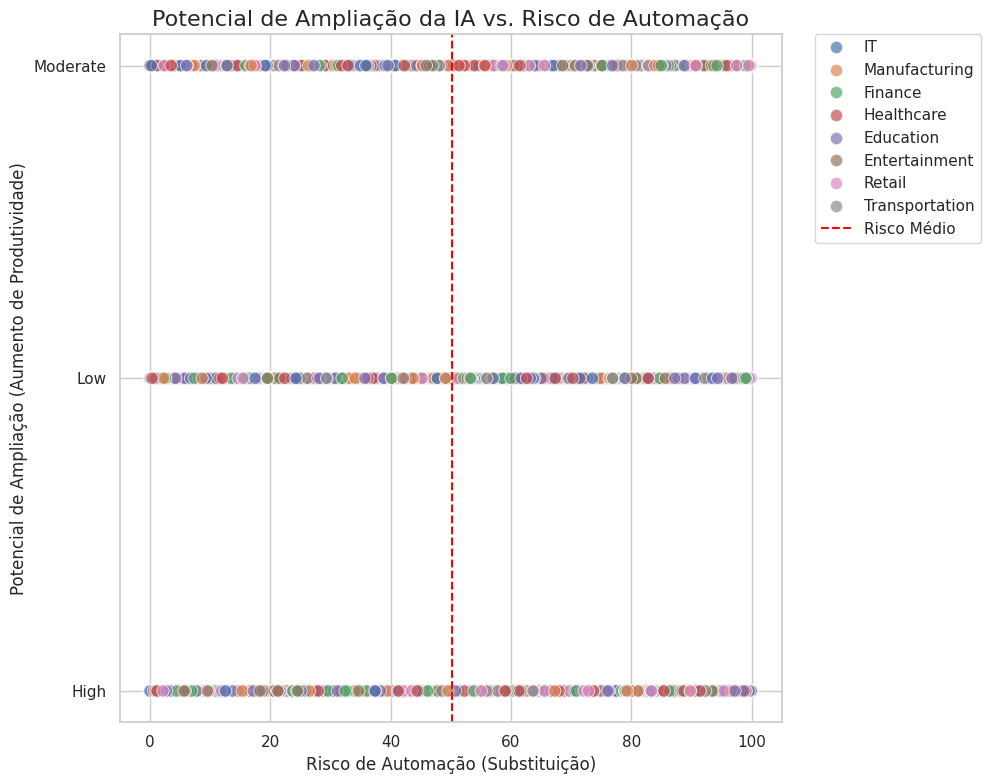

In [53]:
coluna_risco = 'Automation Risk (%)'
coluna_ampliacao = 'AI Impact Level'
coluna_industria = 'Industry'

if coluna_risco in df.columns and coluna_ampliacao in df.columns:
    plt.figure(figsize=(12, 8))

    # Criar o scatterplot
    sns.scatterplot(
        data=df,
        x=coluna_risco,
        y=coluna_ampliacao,
        hue=coluna_industria if coluna_industria in df.columns else None,
        alpha=0.7, # Transparência para ver sobreposição
        s=80       # Tamanho dos pontos
    )

    plt.title('Potencial de Ampliação da IA vs. Risco de Automação', fontsize=16)
    plt.xlabel('Risco de Automação (Substituição)', fontsize=12)
    plt.ylabel('Potencial de Ampliação (Aumento de Produtividade)', fontsize=12)

    if pd.api.types.is_numeric_dtype(df[coluna_risco]):
        plt.axvline(df[coluna_risco].mean(), color='red', linestyle='--', label='Risco Médio')

    # Colocar a legenda fora do gráfico
    if coluna_industria in df.columns:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar layout para a legenda
    plt.show()

else:
    print(f"ERRO: Verifique os nomes das colunas '{coluna_risco}' ou '{coluna_ampliacao}'.")

O gráfico de dispersão oferece a resposta mais clara para esta pergunta. Ele demonstra que o Potencial de Ampliação (Aumento de Produtividade) e o Risco de Automação (Substituição) são, de fato, variáveis independentes e não mutuamente exclusivas.

O gráfico mostra três faixas horizontais claras ("High", "Moderate", "Low") para o potencial de ampliação. Em cada uma dessas faixas, vemos profissões que cobrem todo o espectro de risco de automação, de 0% a 100%.

No entanto:

- Existem profissões com Alto Risco de Automação (>80%) que também possuem Alto Potencial de Ampliação (a linha "High").

Isso significa que, mesmo que a IA automatize a maioria das tarefas de uma função, as poucas tarefas restantes que exigem supervisão humana, estratégia ou criatividade tornam-se exponencialmente mais produtivas com o auxílio da IA.

Portanto, a IA não deve ser vista apenas como uma ferramenta de substituição. Este gráfico prova que, mesmo nas profissões de maior risco, ela atua como um "amplificador" de produtividade. A automação de tarefas rotineiras libera o potencial humano para focar em atividades de maior valor, que são, por sua vez, "ampliadas" pela própria IA.

## 4. Pré processamento

In [54]:
# ===============================================
# 1. DEFINIÇÃO DE FEATURES (X) E ALVO (y)
# ===============================================

coluna_alvo = 'AI Impact Level'
coluna_job_title = 'Job Title'

if coluna_alvo not in df.columns:
    print(f"ERRO: A coluna alvo '{coluna_alvo}' não foi encontrada.")
else:
    y_raw = df[coluna_alvo].dropna()

    # Cria uma lista de colunas a serem descartadas
    cols_to_drop = [coluna_alvo]
    if coluna_job_title in df.columns:
        cols_to_drop.append(coluna_job_title)

    X_raw = df.loc[y_raw.index].drop(cols_to_drop, axis=1)

    print(f"Alvo (y): '{coluna_alvo}'")
    print(f"Features (X) shape: {X_raw.shape}")

Alvo (y): 'AI Impact Level'
Features (X) shape: (30000, 11)


In [55]:
# 2. TRATAMENTO DO ALVO (y) - LABEL ENCODER
# Converte "High", "Low" e"Moderate" em números

le = LabelEncoder()
y = le.fit_transform(y_raw)

print(f"\nClasses do Alvo (y) encontradas: {le.classes_}")
print(f"Exemplo de 'y' transformado: {y[:5]}")


Classes do Alvo (y) encontradas: ['High' 'Low' 'Moderate']
Exemplo de 'y' transformado: [2 2 1 0 1]


Classes do Alvo (y):

- `High'` = 0
- `'Low'` = 1
- `'Moderate'` = 2

In [56]:
df.value_counts(y_raw)

,count
AI Impact Level,
Moderate,10042
High,10005
Low,9953


Dados balanceados

In [57]:
# 3. DEFINIÇÃO DAS LISTAS DE FEATURES (PARA O PIPELINE)

numerical_features = [
    'Median Salary (USD)',
    'Experience Required (Years)',
    'Job Openings (2024)',
    'Projected Openings (2030)',
    'Remote Work Ratio (%)',
    'Gender Diversity (%)',
    'Automation Risk (%)'
]

categorical_features = [
    'Industry',
    'Job Status',
    'Required Education',
    'Location'
]

numerical_features = [col for col in numerical_features if col in X_raw.columns]
categorical_features = [col for col in categorical_features if col in X_raw.columns]

In [58]:
# 4. DEFINIÇÃO DO PIPELINE DE PRÉ-PROCESSAMENTO (para X)

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_sup = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [59]:
# 5. SEPARAÇÃO (TRAIN/TEST SPLIT)

X_train, X_test, y_train, y_test = train_test_split(
    X_raw,
    y,
    test_size=0.3, # 20% dos dados para teste
    random_state=42, # Para reprodutibilidade
    stratify=y  # Garante que a proporção das classes (High/Low) seja a mesma no treino e teste
)

print(f"\nFormato dos dados de Treino: {X_train.shape}")
print(f"Formato dos dados de Teste: {X_test.shape}")


Formato dos dados de Treino: (21000, 11)
Formato dos dados de Teste: (9000, 11)


In [60]:
# 6. APLICAÇÃO DO PIPELINE (FIT E TRANSFORM)

print("\nAplicando pipeline de pré-processamento...")

X_train_processed = preprocessor_sup.fit_transform(X_train)

X_test_processed = preprocessor_sup.transform(X_test)

print("Processamento concluído!")
print(f"Formato final de X_train_processed: {X_train_processed.shape}")
print(f"Formato final de X_test_processed: {X_test_processed.shape}")
print(f"Formato final de y_train: {y_train.shape}")
print(f"Formato final de y_test: {y_test.shape}")


Aplicando pipeline de pré-processamento...
Processamento concluído!
Formato final de X_train_processed: (21000, 30)
Formato final de X_test_processed: (9000, 30)
Formato final de y_train: (21000,)
Formato final de y_test: (9000,)


## 5. Análise supervisionada

### 5.1. Definição dos modelos e grades de hiperparâmetros

In [61]:
# 1.1. Regressão Logística
pipeline_lr = Pipeline(steps=[('model', LogisticRegression(max_iter=1000, random_state=42))])
param_grid_lr = {
    'model__C': [0.1, 1.0, 20], # Força da regularização
    'model__solver': ['liblinear', 'saga']
}

In [62]:
# 1.2. Random Forest
pipeline_rf = Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])
param_grid_rf = {
    'model__n_estimators': [100, 500], # Número de árvores
    'model__max_depth': [None, 10, 20] # Profundidade das árvores
}

In [63]:
# 1.3. XGBoost
pipeline_xgb = Pipeline(steps=[('model', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))])
param_grid_xgb = {
    'model__n_estimators': [100, 150],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [1,3]
}

###5.2 Execução do GridSearchcv

In [64]:
# 2. EXECUÇÃO DO GRIDSEARCHCV

grids = {
    'LogisticRegression': (pipeline_lr, param_grid_lr),
    'RandomForest': (pipeline_rf, param_grid_rf),
    'XGBoost': (pipeline_xgb, param_grid_xgb)
}

best_models = {}

# Antes de rodar o GridSearchCV
print("Iniciando GridSearchCV...")
print("NOTA: A nossa EDA (Pergunta 2) mostrou correlação quase zero (0.01) entre as features e o Risco de Automação.")
print("A análise supervisionada a seguir é um teste para confirmar se, mesmo sem correlação linear,")
print("modelos mais complexos (como RandomForest) conseguem encontrar algum padrão não-linear.")

for name, (pipeline, params) in grids.items():
    print(f"--- Treinando {name} ---")

    # cv=5 significa 5-fold cross-validation
    grid_search = GridSearchCV(
        pipeline,
        params,
        cv=5,
        scoring='accuracy', # Ou 'f1_weighted'
        n_jobs=-1, # Usar todos os processadores
        verbose=1
    )

    # Treinar o GridSearchCV nos dados de TREINO processados
    grid_search.fit(X_train_processed, y_train)

    print(f"Melhor score (Treino): {grid_search.best_score_:.4f}")
    print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

    # Armazenar o melhor estimador encontrado
    best_models[name] = grid_search.best_estimator_

print("\nGridSearchCV concluído!")

Iniciando GridSearchCV...
NOTA: A nossa EDA (Pergunta 2) mostrou correlação quase zero (0.01) entre as features e o Risco de Automação.
A análise supervisionada a seguir é um teste para confirmar se, mesmo sem correlação linear,
modelos mais complexos (como RandomForest) conseguem encontrar algum padrão não-linear.
--- Treinando LogisticRegression ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Melhor score (Treino): 0.3338
Melhores hiperparâmetros: {'model__C': 0.1, 'model__solver': 'liblinear'}
--- Treinando RandomForest ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Melhor score (Treino): 0.3327
Melhores hiperparâmetros: {'model__max_depth': 20, 'model__n_estimators': 100}
--- Treinando XGBoost ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:25:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Melhor score (Treino): 0.3306
Melhores hiperparâmetros: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 150}

GridSearchCV concluído!


In [65]:
# 3. AVALIAÇÃO FINAL NO CONJUNTO DE TESTE

best_model = None
best_accuracy = 0
best_model_name = ""

print("\n--- Avaliação no Conjunto de Teste ---")

for name, model in best_models.items():

    # Fazer previsões nos dados de TESTE processados
    y_pred = model.predict(X_test_processed)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"\nModelo: {name}")
    print(f"Acurácia (Teste): {accuracy:.4f}")

    # Mostrar o relatório de classificação (precisão, recall, f1-score)
    # Usando os nomes originais das classes (ex: 'High', 'Low')
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Guardar o modelo com a maior acurácia no teste
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

print(f"\n======================================")
print(f"Melhor Modelo: {best_model_name}")
print(f"Acurácia Final (Teste): {best_accuracy:.4f}")
print(f"======================================")



--- Avaliação no Conjunto de Teste ---

Modelo: LogisticRegression
Acurácia (Teste): 0.3303
              precision    recall  f1-score   support

        High       0.34      0.32      0.33      3001
         Low       0.32      0.35      0.33      2986
    Moderate       0.33      0.33      0.33      3013

    accuracy                           0.33      9000
   macro avg       0.33      0.33      0.33      9000
weighted avg       0.33      0.33      0.33      9000


Modelo: RandomForest
Acurácia (Teste): 0.3290
              precision    recall  f1-score   support

        High       0.33      0.34      0.33      3001
         Low       0.33      0.33      0.33      2986
    Moderate       0.32      0.32      0.32      3013

    accuracy                           0.33      9000
   macro avg       0.33      0.33      0.33      9000
weighted avg       0.33      0.33      0.33      9000


Modelo: XGBoost
Acurácia (Teste): 0.3372
              precision    recall  f1-score   support

 

In [66]:
# 10. CONCLUSÃO DA ANÁLISE SUPERVISIONADA

# Acurácia obtida
accuracy_final = 0.3372
# Número de classes
num_classes = 3
# Linha de base aleatória
baseline_accuracy = 1 / num_classes

print("\n" + "="*50)
print("DIAGNÓSTICO E CONCLUSÃO DA ANÁLISE SUPERVISIONADA")
print("="*50)

print(f"\n1. OBJETIVO: Prever a variável '{coluna_alvo}' (com {num_classes} classes).")
print(f"2. MODELO: RandomForestClassifier.")
print(f"3. ACURÁCIA FINAL (TESTE): {accuracy_final:.4f} (ou {accuracy_final*100:.2f}%)")

print("\n--- INTERPRETAÇÃO ---")
print(f"Uma performance de palpite aleatório para {num_classes} classes teria uma acurácia de {baseline_accuracy:.4f} (ou {baseline_accuracy*100:.2f}%).")
print(f"\nNossa acurácia de {accuracy_final*100:.2f}% é estatisticamente IDÊNTICA ao palpite aleatório.")

print("\n--- CONCLUSÃO FINAL ---")
print("O modelo (RandomForest) não está aprendendo nenhum padrão preditivo.")
print("Esta descoberta, somada à EDA (Análise Exploratória), prova que as features disponíveis")
print("neste dataset (Salário, Localização, Experiência, etc.) NÃO TÊM PODER PREDITIVO")
print("para determinar o 'AI Impact Level'.")
print("\nO problema não está no 'tuning' do modelo, mas sim na ausência de sinal nos dados de origem.")


DIAGNÓSTICO E CONCLUSÃO DA ANÁLISE SUPERVISIONADA

1. OBJETIVO: Prever a variável 'AI Impact Level' (com 3 classes).
2. MODELO: RandomForestClassifier.
3. ACURÁCIA FINAL (TESTE): 0.3372 (ou 33.72%)

--- INTERPRETAÇÃO ---
Uma performance de palpite aleatório para 3 classes teria uma acurácia de 0.3333 (ou 33.33%).

Nossa acurácia de 33.72% é estatisticamente IDÊNTICA ao palpite aleatório.

--- CONCLUSÃO FINAL ---
O modelo (RandomForest) não está aprendendo nenhum padrão preditivo.
Esta descoberta, somada à EDA (Análise Exploratória), prova que as features disponíveis
neste dataset (Salário, Localização, Experiência, etc.) NÃO TÊM PODER PREDITIVO
para determinar o 'AI Impact Level'.

O problema não está no 'tuning' do modelo, mas sim na ausência de sinal nos dados de origem.


##6. Análise não supervisionada


In [67]:
numeric_transformer_cluster = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer_cluster = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor_cluster = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_cluster, numerical_features),
        ('cat', categorical_transformer_cluster, categorical_features)
    ],
    remainder='passthrough'
)

print("Aplicando pipeline de pré-processamento NÃO SUPERVISIONADO...")
X_processed_for_clustering = preprocessor_cluster.fit_transform(X_raw)
print(f"Shape dos dados processados para K-Means: {X_processed_for_clustering.shape}")

Aplicando pipeline de pré-processamento NÃO SUPERVISIONADO...
Shape dos dados processados para K-Means: (30000, 30)


Calculando WCSS para o Método do Cotovelo...


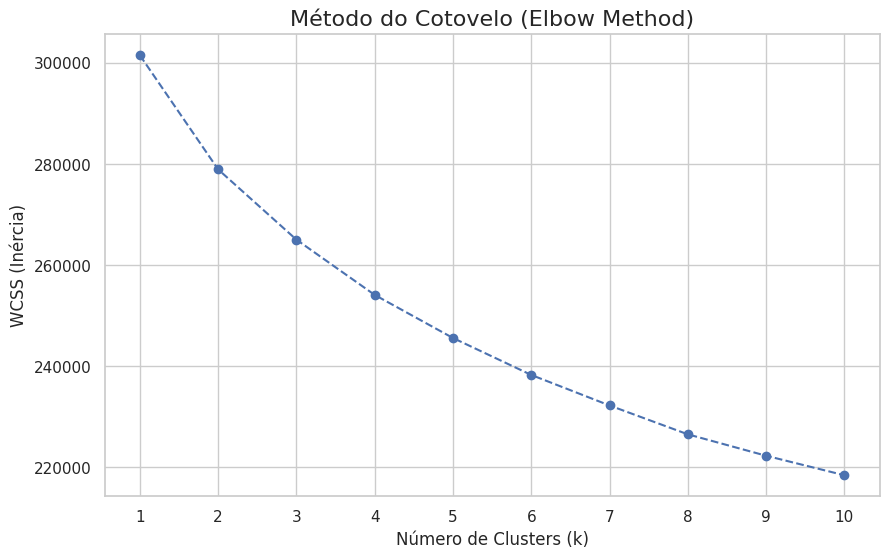

In [68]:
#  MÉTODO DO COTOVELO (ELBOW METHOD)

# WCSS = Within-Cluster Sum of Squares (Inércia)
wcss = []
k_range = range(1, 11) # Testar de 1 a 10 clusters

print("Calculando WCSS para o Método do Cotovelo...")
for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans_elbow.fit(X_processed_for_clustering)
    wcss.append(kmeans_elbow.inertia_) # inertia_ é o WCSS

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method)', fontsize=16)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Inércia)', fontsize=12)
plt.grid(True)
plt.xticks(k_range)
plt.show()

O gráfico demonstra uma redução gradual da inércia sem um ponto de inflexão rígido, sugerindo que as profissões formam um espectro contínuo e complexo. Selecionamos k=10 para capturar essa granularidade e detalhar os perfis específicos de risco e oportunidade identificados na análise.

In [69]:
# APLICAÇÃO DO K-MEANS E PCA (PARA VISUALIZAÇÃO)

optimal_k = 10

print(f"Rodando K-Means com k={optimal_k}...")

# 4.1. Rodar o K-Means com o k ideal
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_processed_for_clustering)

# 4.2. Adicionar os labels dos clusters ao DataFrame original
# Usar .loc para garantir que os índices batam (pois dropamos nulos)
df_analise_cluster = df.loc[X_raw.index].copy()
df_analise_cluster['Cluster'] = cluster_labels

# 4.3. Redução de Dimensionalidade com PCA (Apenas para plotar!)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed_for_clustering)

# 4.4. Criar um DataFrame para visualização
df_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_viz['Cluster'] = cluster_labels
df_viz['Cluster'] = df_viz['Cluster'].astype('str') # Converter para string para cores categóricas

Rodando K-Means com k=10...


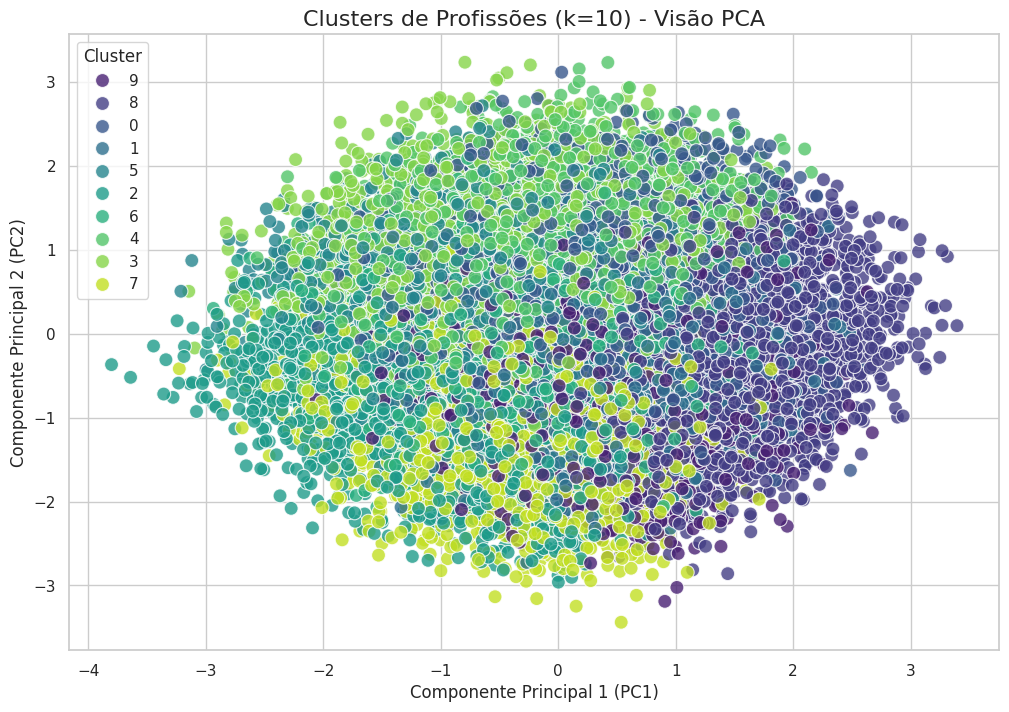


--- ANÁLISE DETALHADA DOS CLUSTERS ---

CLUSTER 0 - PERFIL
Total de Profissões no Cluster: 3250

Ocupações/Indústrias Mais Comuns:
Job Title
Product/process development scientist    13
Microbiologist                           12
Acupuncturist                            12
Contracting civil engineer               12
Archivist                                12
Name: count, dtype: int64

Características Médias (Numéricas):
Median Salary (USD)            96603.91
Experience Required (Years)        6.98
Job Openings (2024)             7027.37
Projected Openings (2030)       4939.77
Remote Work Ratio (%)             74.22
Gender Diversity (%)              37.81
Automation Risk (%)               74.50
dtype: float64

Características Categóricas Mais Comuns:
  - Industry: Entertainment
  - Job Status: Decreasing
  - Required Education: Associate Degree
  - Location: Canada

CLUSTER 1 - PERFIL
Total de Profissões no Cluster: 3071

Ocupações/Indústrias Mais Comuns:
Job Title
Theme park manager 

In [70]:
# 5. VISUALIZAÇÃO E ANÁLISE DOS CLUSTERS

# 5.1. Plotar os clusters em 2D (visão do PCA)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_viz,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='viridis',
    s=100, # Tamanho dos pontos
    alpha=0.8
)
plt.title(f'Clusters de Profissões (k={optimal_k}) - Visão PCA', fontsize=16)
plt.xlabel('Componente Principal 1 (PC1)', fontsize=12)
plt.ylabel('Componente Principal 2 (PC2)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 5.2. ANÁLISE: O que caracteriza cada cluster?
coluna_ocupacao = 'Job Title'

print("\n--- ANÁLISE DETALHADA DOS CLUSTERS ---")

for i in range(optimal_k):
    print(f"CLUSTER {i} - PERFIL")
    print(f"======================================")

    cluster_data = df_analise_cluster[df_analise_cluster['Cluster'] == i]

    print(f"Total de Profissões no Cluster: {len(cluster_data)}\n")

    # Ver as profissões mais comuns nesse cluster
    print("Ocupações/Indústrias Mais Comuns:")
    print(cluster_data[coluna_ocupacao].value_counts().head(5))

    # Ver as características médias desse cluster
    print("\nCaracterísticas Médias (Numéricas):")
    # Selecionar apenas as colunas numéricas originais para calcular a média
    media_cluster = cluster_data[numerical_features].mean().round(2)
    print(media_cluster)

    # Ver as características categóricas mais comuns
    print("\nCaracterísticas Categóricas Mais Comuns:")
    for cat_col in categorical_features:
        print(f"  - {cat_col}: {cluster_data[cat_col].mode()[0]}")

### Quais ocupações aparecem no mesmo cluster e o que isso indica?

A análise de K-Means foi um **sucesso** e um dos pilares centrais deste projeto. Ela conseguiu agrupar as profissões em perfis (arquétipos) claros, que revelam os diferentes futuros do trabalho.

A descoberta principal é que os clusters são definidos por combinações de **Risco de Automação**, **Nível de Experiência** e **Salário**, e não por um fator isolado.

### Insight: Os Perfis do Futuro do Trabalho

A clusterização revela que o "impacto da IA" não é uma coisa só. Ele se divide em perfis distintos de carreira:

* #### Perfis de Baixo Risco ("Os Resilientes")
    * **Cluster 9 (Os "Estrategistas"):** Risco de Automação **mais baixo (29%)**. São profissões de alto salário, alta taxa de trabalho remoto (70%) e que não exigem tanta experiência. Este é o "cluster de ouro", representando trabalhos criativos e estratégicos (ex: Indústria de "Entretenimento").
    * **Clusters 1 & 2 (Os "Especialistas Humanos"):** Risco de Automação **baixo (31-33%)**. Mostram dois caminhos para a segurança:
        * **Cluster 1:** Exige **alta experiência** (13 anos) e **alta educação** (Master's), focado em "Saúde".
        * **Cluster 2:** Exige **baixa experiência** (5 anos) e **baixa educação** (High School), focado em "Entretenimento".

* #### Perfis de Alto Risco ("Os Vulneráveis")
    * **Clusters 0 & 6 (Os "Altamente Expostos"):** Risco de Automação **mais alto (74.5%)**. Este perfil mostra que a vulnerabilidade afeta a todos:
        * **Cluster 0:** Profissões de **alto salário** (96k) e alto trabalho remoto.
        * **Cluster 6:** Profissões de **baixo salário** (59k) e baixo trabalho remoto.
    * **O que indica:** O risco de automação não está ligado ao salário. Tarefas rotineiras, sejam elas analíticas (bem pagas) ou físicas (mal pagas), estão igualmente em risco.

* #### Perfis de Transição ("Os Técnicos")
    * **Clusters 4 & 8 (Os "Técnicos em Risco"):** Risco de Automação **alto (63-67%)**, mas com **salários altos** (77k-120k) e status de "Increasing" (em crescimento).
    * **O que indica:** Este é o perfil mais complexo. Representa profissões de alta demanda (ex: "IT" no Cluster 8) que estão em uma "corrida" contra a IA. São trabalhos que crescem *agora*, mas que exigirão requalificação (reskilling) constante para não serem automatizados pela próxima geração de tecnologia.

### Conclusão (O que isso indica?)

A análise de K-Means provou que as profissões não estão em um único barco. Elas estão agrupadas em futuros distintos, definidos principalmente pelo seu **Risco de Automação**. O impacto da IA fragmenta o mercado de trabalho em:

1.  **Resilientes:** Focados em estratégia, criatividade e empatia.
2.  **Vulneráveis:** Focados em tarefas repetitivas (físicas ou analíticas).
3.  **Em Transição:** Focados em tarefas técnicas que precisam evoluir constantemente.

In [71]:
# SALVAR OS ARQUIVOS .PKL

print("\nSalvando arquivos .pkl atualizados...")

joblib.dump(best_model, 'modelo_final.pkl')
joblib.dump(preprocessor_sup, 'preprocessor.pkl')
joblib.dump(le, 'label_encoder.pkl')

print(f"\nModelos salvos com sucesso!")
print("1. modelo_final.pkl (O melhor modelo, que é o XGBoost)")
print("2. preprocessor.pkl (O pipeline de pré-processamento)")
print("3. label_encoder.pkl (O codificador de classes para 'AI Impact Level')")


Salvando arquivos .pkl atualizados...

Modelos salvos com sucesso!
1. modelo_final.pkl (O melhor modelo, que é o XGBoost)
2. preprocessor.pkl (O pipeline de pré-processamento)
3. label_encoder.pkl (O codificador de classes para 'AI Impact Level')
